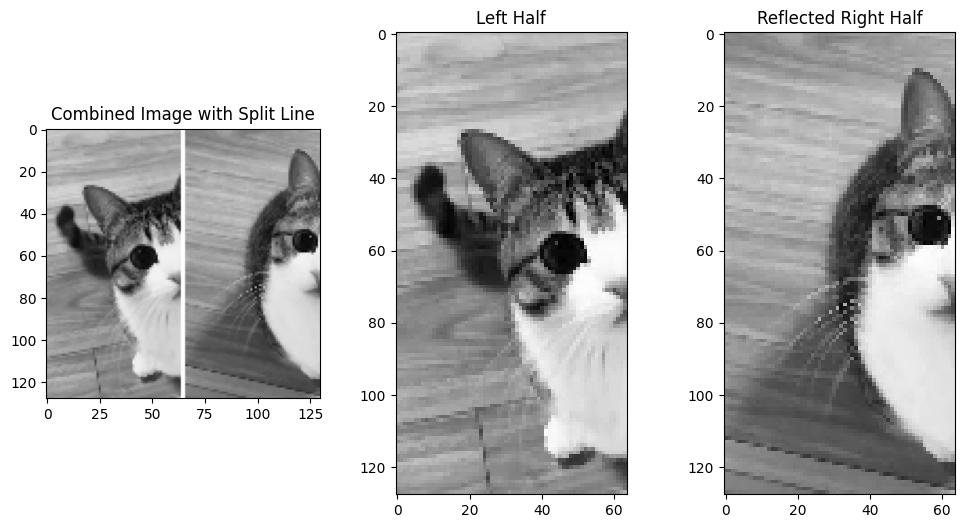

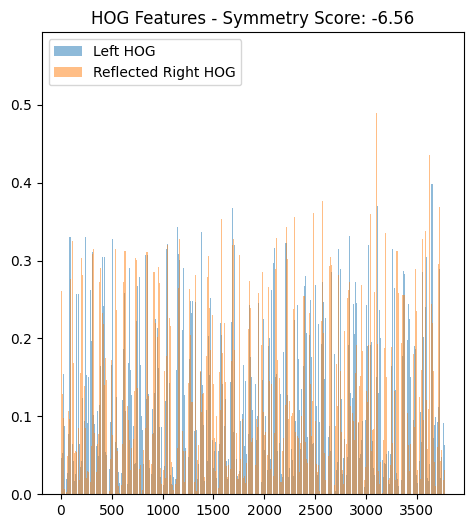

Symmetry Score: -6.56


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hog_symmetry_deduction(image_path, visualization=False):
    # 1. Load and Preprocess the Image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 128))

    # 2. Split Image into Left and Right Halves
    midpoint = image.shape[1] // 2
    left_image = image[:, :midpoint]
    right_image = image[:, midpoint:]

    # 3. Reflect Right Half
    right_image_reflected = cv2.flip(right_image, 1)

    # 4. Create Combined Image with Line in Between
    combined_image = np.zeros((image.shape[0], image.shape[1] + 2), dtype=np.uint8)
    combined_image[:, :midpoint] = left_image
    combined_image[:, midpoint+2:] = right_image_reflected
    combined_image[:, midpoint:midpoint+2] = 255

    # 5. Calculate HOG Features
    hog_descriptor = cv2.HOGDescriptor()
    left_hog_features = hog_descriptor.compute(left_image)
    right_hog_features = hog_descriptor.compute(right_image_reflected)

    # 6. Calculate Symmetry Score (Similarity Metric)
    symmetry_score = 1 - np.linalg.norm(left_hog_features - right_hog_features)

    # 7. Visualize (Optional)
    if visualization:
        plt.figure(figsize=(12, 6))
        plt.subplot(131), plt.imshow(combined_image, cmap='gray'), plt.title('Combined Image with Split Line')
        plt.subplot(132), plt.imshow(left_image, cmap='gray'), plt.title('Left Half')
        plt.subplot(133), plt.imshow(right_image_reflected, cmap='gray'), plt.title('Reflected Right Half')

        plt.figure(figsize=(12, 6))
        plt.subplot(121), plt.bar(range(len(left_hog_features)), left_hog_features, alpha=0.5, label='Left HOG')
        plt.bar(range(len(right_hog_features)), right_hog_features, alpha=0.5, label='Reflected Right HOG')
        plt.legend(), plt.title(f'HOG Features - Symmetry Score: {symmetry_score:.2f}')
        plt.show()

    return symmetry_score

image_path = '/content/1_cat2.png'
symmetry_score = hog_symmetry_deduction(image_path, visualization=True)
print(f"Symmetry Score: {symmetry_score:.2f}")